In [24]:
import pandas as pa

In [25]:
data = pa.read_csv('food_truck.csv')
data.head()

,Population(10.000),Profit(10.000 $)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [26]:
#On découpe les données en X et en Y:
X = data['Population(10.000)']
print(X.head())
Y = data['Profit(10.000 $)']
print(Y.head())

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: Population(10.000), dtype: float64
0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit(10.000 $), dtype: float64


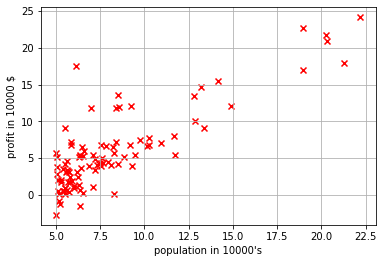

In [27]:
#On peut visualiser les données : 
import matplotlib.pyplot as plt
%matplotlib inline
axes = plt.axes()
#On dessine une grille pour une meilleur lecture du graphique :
axes.grid()
#On définit les axes : il s'agit de notre X et de notre Y :
plt.scatter(X,Y,color="red",marker="x")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.show()

#### Régression linéaire simple (à la main)

In [28]:
import numpy as np
x_bar = np.mean(X)
y_bar = np.mean(Y)
a = np.sum((Y-y_bar) * (X-x_bar)) / np.sum((X-x_bar)*(X-x_bar))
b = y_bar - a*x_bar
print('modèle de régression "à la main" :')
print('Y = ', a, '* X + ', b)

modèle de régression "à la main" :
Y =  1.1930336441895937 * X +  -3.89578087831186


#### Régression linéaire simple avec <code>stats</code>

In [29]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [30]:
print(slope, intercept, r_value, p_value, std_err)

1.1930336441895941 -3.8957808783118555 0.8378732325263409 1.0232099778760961e-26 0.07974394383258743


R^2 = 84%
--> 84% de la variation de Y est expliquée par X

H_0 : Beta_1 = 0
r_value =1.0232099778760961e-26 <<< 0.05 = 5%
--> On rejette H0 au risque alpha = 5%

In [31]:
print('modèle de régression : ')
print ('Y = ', slope,' * X + ', intercept)

modèle de régression : 
Y =  1.1930336441895941  * X +  -3.8957808783118555


In [32]:
def predict(x):
    return slope * x + intercept

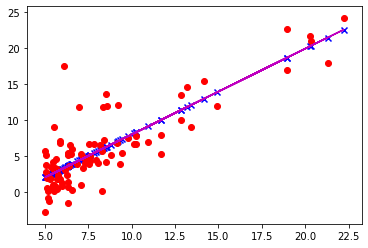

In [15]:
#On prédit à présent les valeurs de X:
fitline = predict(X)
fitline.head()
#Et on dessine le nuage ainsi que la ligne de régression :
plt.scatter(X, fitline,color='blue',marker='x')
plt.scatter(X,Y,color='red',marker='o')
plt.plot(X, fitline, c='m')

plt.show()